<a href="https://colab.research.google.com/github/PaulFSherwood/python/blob/master/AI/DeepComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Computer Vision**
https://www.youtube.com/watch?v=tPYj3fFJGjk&t=3437s

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Load images

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 2s 0us/step


Look at one image.

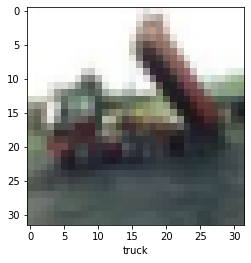

In [7]:
# Let's look at a one image
IMG_INDEX = 2  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

# **CNN Architecture**
Conv2d - MaxPooling2D
stack of convolutional and maxPooling layers extract the features from the image. 

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()  # let's have a look at our model so far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


# **Adding Dense Layers**

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

# **Training**

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5903 - accuracy: 0.7916 - val_loss: 0.9282 - val_accuracy: 0.6899
Epoch 2/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.5437 - accuracy: 0.8096 - val_loss: 0.9353 - val_accuracy: 0.7024
Epoch 3/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.5261 - accuracy: 0.8107 - val_loss: 0.9039 - val_accuracy: 0.7072
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4872 - accuracy: 0.8284 - val_loss: 0.9637 - val_accuracy: 0.7091
Epoch 5/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.4539 - accuracy: 0.8401 - val_loss: 0.9956 - val_accuracy: 0.7020
Epoch 6/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.4374 - accuracy: 0.8473 - val_loss: 0.9927 - val_accuracy: 0.7002
Epoch 7/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.3975 - accuracy: 0.8609 - val_loss: 1.0230 -

Evaluating the model

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 1.3655 - accuracy: 0.6931
0.6930999755859375


**Data Augmentation**

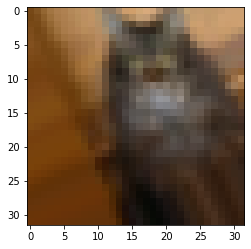

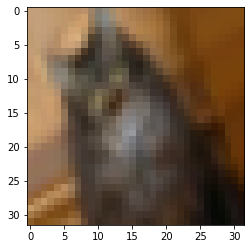

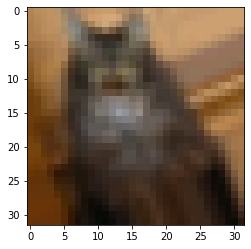

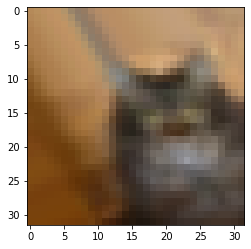

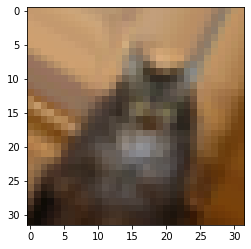

In [19]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[26]
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()